Melakukan import library yang akan digunakan dalam project

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report

Untuk menjalankan project di google colab, kami meletakan data di google drive, berikut ini adalah proses pengambilan data dan melihat salah satu data dengan menggunakan library cv2 dan untuk visualisasi menggunakan matplotlib.pyplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


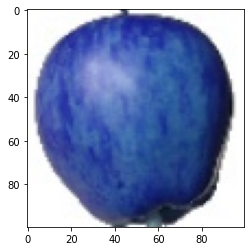

In [ ]:
#Mengambil salah satu dataset Train untuk menunjukan langkah-langkah ekstraksi
#ciri citra sampai dijadikan dataset
contohTrain = '/content/drive/MyDrive/bigdata/training/Apple/0_100.jpg'
#Membaca gambar memasukannya kedalam variable lalu melihat gambarnya
contohTrain = cv2.imread(contohTrain)
plt.imshow(contohTrain)

Berikut ini melakukan perubahan warna menjadi RGB untuk contoh salah satu buah 

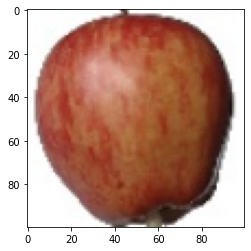

In [ ]:
#Mengubah warna gambar menjadi warna original
b,g,r = cv2.split(contohTrain)

contohTrainOri = cv2.merge([r,g,b])

plt.imshow(contohTrainOri)

Setelah hasil citra didapat, dilakukan normalisasi dengan range 0-1, lalu meratakan nilai RGB untuk setiap citra berikut ini visualisasi hasil rata-rata RGB untuk gambar appel diatas.

In [ ]:
#Merata-ratakan gambar dengan range 0-1 untuk nilai 1 sama dengan 255
contohTrainRata2 = contohTrainOri.astype('float')/255
#Menghitung nilai rata-rata RGB
meanTrainContoh = np.mean(contohTrainRata2 , axis=(0, 1))
meanTrainContoh

array([0.69765725, 0.50475529, 0.43649412])

Mengambil seluruh data pada folder training dan dilakukan looping untuk mendapatkan data gambar training berdasarkan lable dan dilakukan proses seperti contoh diatas mulai dari memasukan citra, merubah menjadi RGB, normalisasi dan terakhir mendapatkan nilai rata-rata RGB dan mendaptkan labelnya yang akan dimasukan sebagai data training

In [ ]:
train_path = '/content/drive/MyDrive/bigdata/training'
cols = np.arange(meanTrainContoh.shape[0])
dfTraining = pd.DataFrame(columns = cols)
labelcolTraining = []

listBuah = os.listdir(train_path)
x = 0

In [ ]:
#Melakukan loop untuk mengulang proses diatas untuk seluruh gambar dataset Train
#DEngan batasan loop sejumlah 16 untuk kelas pada dimensi pertama
#dan menggunakan imagelist untuk mengambil jumlah gambar pada tiap kelas untuk
#batasan loop dimensi kedua

for f in listBuah[0:17] : 
    jenisBuah = '%s/%s' % (train_path,f)
    
    
    imagelist = os.listdir(jenisBuah)
    
    for i in imagelist:
        namaGambar = '%s/%s' % (jenisBuah,i)
    
        img = cv2.imread(namaGambar)

        b,g,r = cv2.split(img)

        imgOri = cv2.merge([r,g,b])

        imgOri = imgOri.astype('float')/255
        meanTrain = np.mean(imgOri, axis=(0, 1))
        
        meanTrain = meanTrain.flatten()
    
        dfTraining.loc[x] = meanTrain
    
        x = dfTraining.shape[0] + 1
        labelcolTraining.append(f)
        
dfTraining['label'] = labelcolTraining
dfTraining['label'].value_counts(normalize = True)
dfTraining = shuffle(dfTraining ).reset_index(drop = True)

Beriku ini langkah yang sama, namun untuk data testing, hal ini dikarenakan di data kami untuk data testing dan data training sudah dipisah dari dataset yang kami peroleh di halaman web berikut : https://www.kaggle.com/moltean/fruits

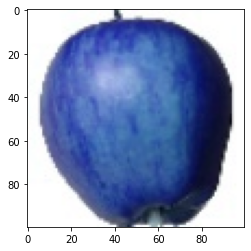

In [ ]:
#Mengambil salah satu dataset Testing untuk menunjukan langkah-langkah ekstraksi
#ciri citra sampai dijadikan dataset untuk langkahnya sama seperti Training
contohTesting = '/content/drive/MyDrive/bigdata/test/Apple/321_100.jpg'

contohTesting= cv2.imread(contohTesting)
plt.imshow(contohTesting)

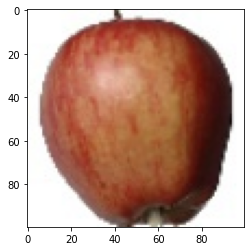

In [ ]:
b,g,r = cv2.split(contohTesting)

contohTestingOri = cv2.merge([r,g,b])

plt.imshow(contohTestingOri)

contohTestingOri = contohTestingOri.astype('float')/255
meanTesting = np.mean(contohTestingOri, axis=(0, 1))

In [ ]:
testing = '/content/drive/MyDrive/bigdata/training/'

cols = np.arange(meanTesting.shape[0])
dfTesting = pd.DataFrame(columns = cols)
labelcolTesting = []

fruitlist = os.listdir(testing)
x = 0

In [ ]:
for f in fruitlist[0:17] : 
    classTesting = '%s/%s' % (testing,f)
    
    imagelist = os.listdir(classTesting)
    
    for i in imagelist:
        gambarTesting = '%s/%s' % (classTesting,i)
    
        imageTest = cv2.imread(gambarTesting )

        b,g,r = cv2.split(imageTest)

        imageTestOri = cv2.merge([r,g,b])

        imageTestingOri =  imageTestOri.astype('float')/255
        meantesting = np.mean(imageTestingOri, axis=(0, 1))
        
        meantesting = meantesting.flatten()
    
        dfTesting.loc[x] = meantesting
    
        x = dfTesting.shape[0] + 1
        labelcolTesting.append(f)
        
dfTesting['label'] = labelcolTesting
dfTesting['label'].value_counts(normalize = True)
dfTesting = shuffle(dfTesting).reset_index(drop = True)

Setelah data sudah diperoleh menjadi data yang siap diperoses kemudian dilakukan pembuatan variable untuk training dan testing

In [ ]:
# Membuat X and Y variables Training
X_train = dfTraining.drop('label',axis = 1)
y_train = dfTraining['label']

# Membuat X and Y variables Testing
X_test = dfTesting.drop('label',axis = 1)
y_test = dfTesting['label']

Melakukan proses SVM untuk klasifikasi buah, kemudia  menampilkan hasil dari klasifikasi menggunakan SVM dengan menggunakan confusion matrix dan juga memvisualisasikan untuk hasil report akurasi yang didapat setiap label buah dan terakhir memperlihatkan akurasi yang diperoleh untuk klasifikasi buah menggunakan Algoritma SVM

In [ ]:
#mengimport library svm
from sklearn.svm import SVC

svm_model = SVC().fit(X_train,y_train)

trainscore = svm_model.score(X_train,y_train)
testscore = svm_model.score(X_test,y_test)

y_pred = svm_model.predict(X_test)

print("====Laporan Hasil Menggunakan SVM====")
print("Confusion MAtrix:")
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))
print("Akurasi core:",testscore)

====Laporan Hasil Menggunakan SVM====
Confusion MAtrix:
[[463   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29   0]
 [  0 417   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10]
 [  0   0 458   0   0  23   0   0   0   0   0   9   0   0   0   0   0]
 [  0   0   0 462   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 738   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  10   0   0 440   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 490   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 431   0   0   0  35   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 496   0   0   0   0   0   0   0   0]
 [  0  53   0   0   0   0   0   0   0 400   0   0   0   0   0   0  37]
 [  0   0   0   0   0   0   0   0   0   0 479   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 134   0   0   0 358   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 483   0   0   7   0]
 [  0   0   0   0   0